# Haberman Exploratoy Data Analysis

Title: Haberman's Survival Data

Sources: (a) Donor: Tjen-Sien Lim (limt@stat.wisc.edu) (b) Date: March 4, 1999


Attribute Information:

Age of patient at time of operation (numerical)
Patient's year of operation (year - 1900, numerical)
Number of positive axillary nodes detected (numerical)
Survival status (class attribute) 1 = the patient survived 5 years or longer, 2 = the patient died within 5 year
Missing Attribute Values: None

In [8]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [9]:
#Loading Haberman data with pandas
hm_data = pd.read_csv("haberman.csv")

In [10]:
#(Q)How many datapoints and features
hm_data.shape

(306, 4)

In [11]:
#(Q)How many features in hm_data
hm_data.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [15]:
#(Q)How many data points per class
# How many patients survived 5 years or longer , and how many died before 5 years.

hm_data['status'].value_counts()


1    225
2     81
Name: status, dtype: int64

Haberman is an Imbalanced Dataset as nuber of data points per class is not same.

# Objective

Finding feature that can led to clear conclusions.
Dataset have 3 features/columns that can be used to classify "survivors" and "victims".

Steps to follow:
          1.Start with Univariate analysis and find which feature alone can give better insight.
          2.Bivariate analysis for finding viable pair to draw insight.

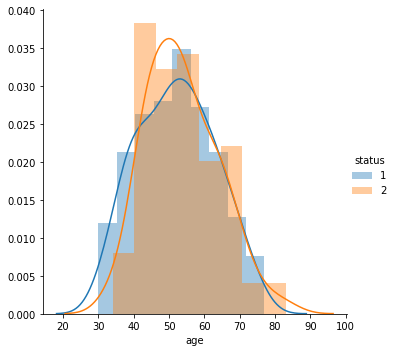

In [19]:
g = sns.FacetGrid(hm_data, hue="status", size=5);
g = g.map(sns.distplot,'age',kde=True);
g.add_legend();
plt.show();


#Age of the patient is not a good feature because , large part of the PDF is overlapped s.
#So considering age of patient to draw conclusion is not a good option.


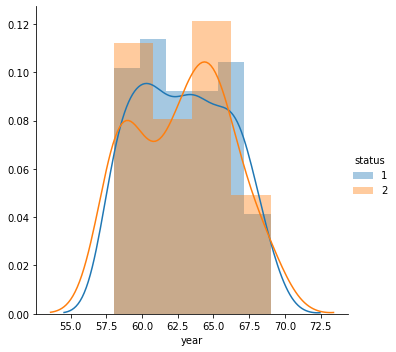

In [20]:
sns.FacetGrid(hm_data, hue="status", size=5) \
   .map(sns.distplot, "year",kde=True) \
   .add_legend();
plt.show();

#Year of operation of patient is not a good feature because , large part of the PDF is overlapped.
#So considering year of patient's operation to draw conclusion is not a good option.


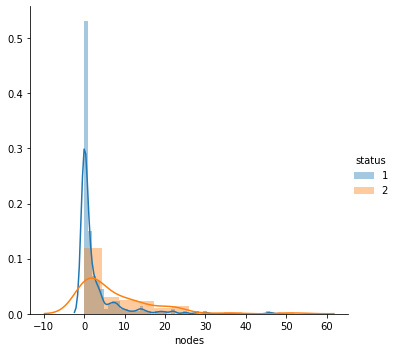

In [22]:
sns.FacetGrid(hm_data, hue="status", size=5) \
   .map(sns.distplot, "nodes",kde=True) \
   .add_legend();
plt.show();


#Count of the axillary lymph nodes in patient is a better feature when compared to others.
#So this feature can be considered.

In [24]:
#survivors is holding patients data who survives for more than 5 years. 
survivors = hm_data.loc[hm_data["status"]== 1]

#victims is holding patients data who survives for less than 5 years.
victims = hm_data.loc[hm_data["status"]== 2]

print("Survivors Data")
print(survivors.head())
print(2*"******************")
print("Victims Data")
print(victims.head())


Survivors Data
   age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1
3   31    59      2       1
4   31    65      4       1
************************************
Victims Data
    age  year  nodes  status
7    34    59      0       2
8    34    66      9       2
24   38    69     21       2
34   39    66      0       2
43   41    60     23       2


[0.44777778 0.02333333 0.01111111 0.00666667 0.00333333 0.00333333
 0.00111111 0.00555556 0.01       0.02111111 0.02444444 0.02333333
 0.03333333 0.02111111 0.03333333 0.12555556 0.10888889 0.08
 0.01222222 0.00444444]
[ 0.    3.85  7.7  11.55 15.4  19.25 23.1  26.95 30.8  34.65 38.5  42.35
 46.2  50.05 53.9  57.75 61.6  65.45 69.3  73.15 77.  ]


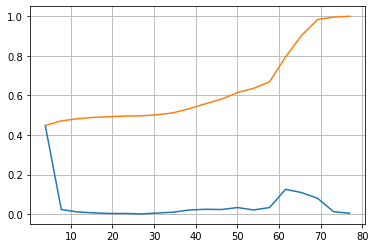

In [28]:
counts, bin_edges = np.histogram(survivors, bins=20, density = True)

pdf = counts/(sum(counts))

print(pdf);

print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


plt.grid(True)
plt.show();

#90% of survivors have less than or eqaul to 10 axillary lymph nodes
#98% of survivors have less than or eqaul to 20 axillary lymph nodes

[0.37962963 0.03395062 0.02777778 0.02160494 0.01234568 0.01851852
 0.         0.         0.00925926 0.0154321  0.03703704 0.03703704
 0.0462963  0.07098765 0.09876543 0.12962963 0.04938272 0.00617284
 0.00308642 0.00308642]
[ 0.    4.15  8.3  12.45 16.6  20.75 24.9  29.05 33.2  37.35 41.5  45.65
 49.8  53.95 58.1  62.25 66.4  70.55 74.7  78.85 83.  ]


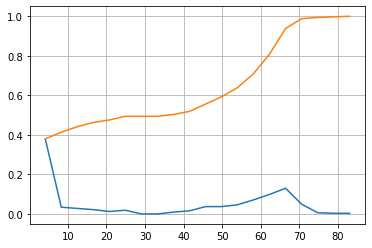

In [29]:
#Victim CDF


counts, bin_edges = np.histogram(victims, bins=20, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


plt.grid(True)
plt.show();

#89% of victims have less than or eqaul to 20 axillary lymph nodes.
#Victims have more distribution over axillary nodes.


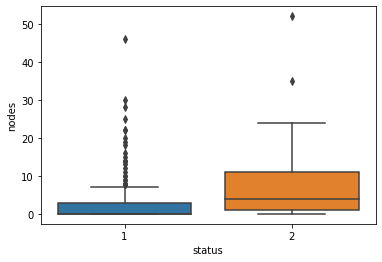

In [31]:
sns.boxplot(x='status',y='nodes', data=hm_data)
plt.show()

#75% of survivors have less than 4 axillary nodes.
#50% of victims have more than 5 axillary nodes.

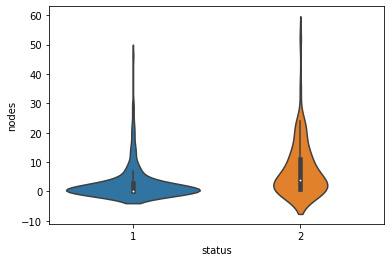

In [32]:
sns.violinplot(x="status", y="nodes", data=hm_data, size=8)
plt.show()

Misclassification error if we use only axillary nodes .
survivors and victims have above 85% of patients with less than 20 axillary nodes.


Lets dive into Bivariate analysis and try to find some insight for drawing some conclusions.

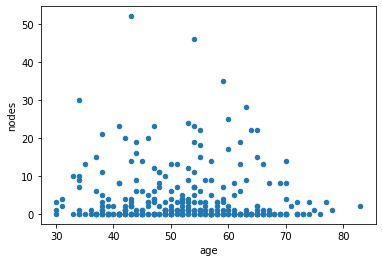

In [33]:
#Scatter plots
# Age vs Auxillary Nodes
hm_data.plot(kind='scatter', x='age', y='nodes') ;
plt.show()

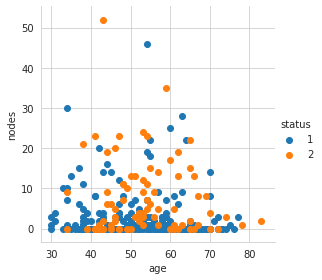

In [35]:
#Color coding for survivors(blue) and victims(orange)

sns.set_style("whitegrid");
sns.FacetGrid(hm_data, hue="status", size=4) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.show();

#Note
#There is so much overlap no classification can be done .


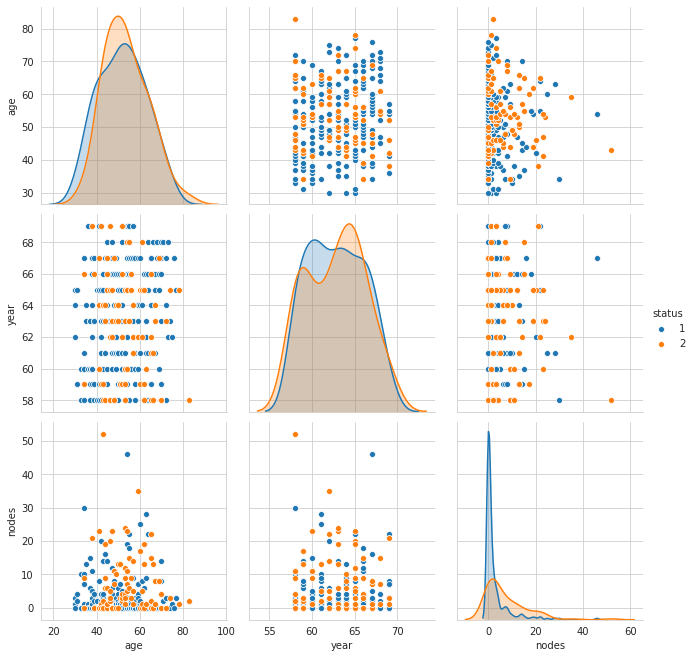

In [36]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(hm_data, hue="status", size=3);
plt.show()



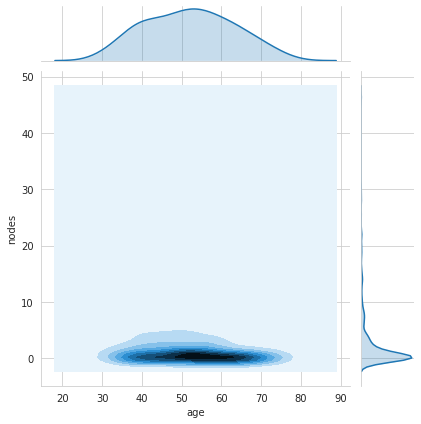

In [37]:
#2D Density plot, contors-plot

sns.jointplot(x="age", y="nodes", data=survivors, kind="kde");
plt.show();

#All survivors have less than 5 axillary nodes

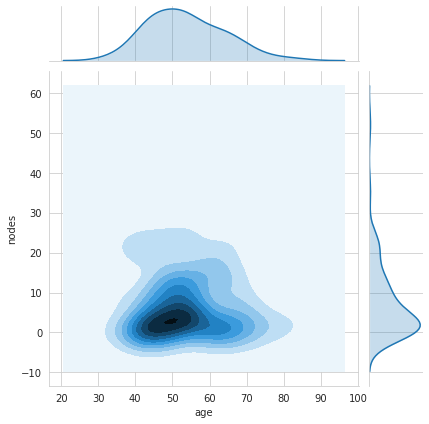

In [38]:
#2D Density plot, contors-plot

sns.jointplot(x="age", y="nodes", data=victims, kind="kde");
plt.show();

#Victims have more number of axillary nodes as compared to survivors.
# 60%-65% victims also suffers with less than 10 axillary nodes.


# Conclusions


1. Patients who survive for more than 5 years after operation have less than 5 axillary nodes
2. Patients who only survive less than 5 years have more axillary nodes.
3. Age does not clearly determines the classification of survivors and victims clearly.
4. Year of operation is also ambigous for classification.

Best feature we used to draw conclusion is count of Axillary count.


